In [37]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples, chains, mcsamples

import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline


In [15]:
#dir_name = '/home/isidro/SuperMC/chains/owaChains1'
#dir_name = '/home/isidro/SuperMC_fork_20nov/april/chains'
dir_name = '/home/isidro/SimpleMC/chains/'
#/home/isidro/SimpleMC/SimpleMC/chains/mcmc_SN+HD+BBAO+Planck.txt
roots = ['owaCDM_phy_HD+SN+BBAO+Planck_mcmc',    
        'owaCDM_phy_HD+SN+BBAO+Planck_nested_dynesty_multi',
        'owaCDM_phy_HD+SN+BBAO+Planck_mcmc_dynesty_multi_ANN']


In [25]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1})

<Figure size 720x648 with 0 Axes>

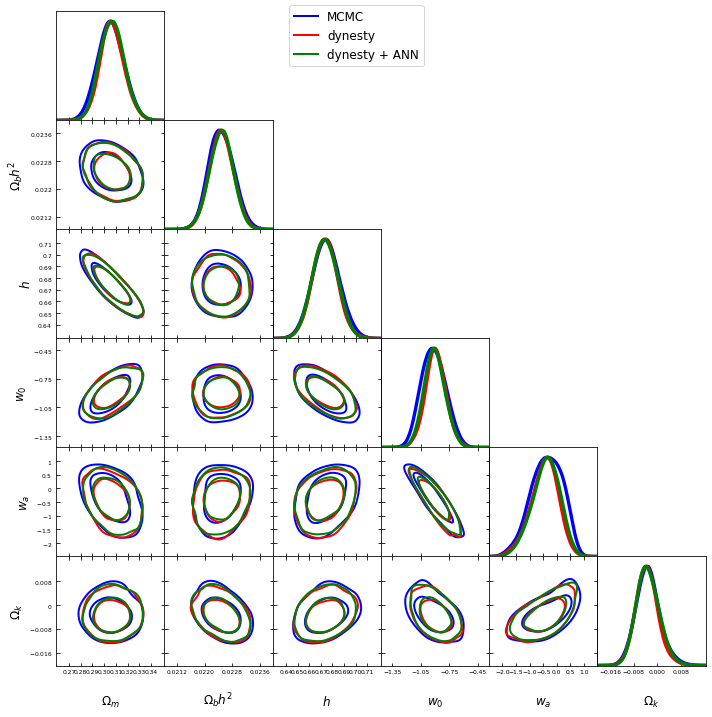

In [35]:
g.settings.axes_fontsize = 6
g.settings.lab_fontsize = 12
#g.settings.alpha_filled_add = 0.5
g.settings.legend_fontsize = 12
#g.settings.axes_fontsize = 10
#g.settings.scatter_size = 9
#g.settings.lw_contour = 3

#g.settings.colormap_scatter='spring'


g.triangle_plot(roots, ['Om', 'Obh2', 'h','w','wa','Ok'], 
                diag1d_kwargs={'colors':['blue','red', 'green']},
                colors=['blue','red', 'green'],
                legend_labels=['MCMC', 'dynesty',
                               'dynesty + ANN'], 
                filled = False, 
                normalized=False, shaded=False)
        

plt.savefig(dir_name+'/'+'samplersTrianglemcmcBambidynesty.png', dpi=300)
plt.show()

# Probando análisis con Getdist

Generate a MCSample object

In [38]:
MHsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[0], settings={'ignore_rows':0.1})

MULTINESTsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[1], settings={'ignore_rows':0.0})

BAMBIsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[2], settings={'ignore_rows':0.0})

/home/isidro/SimpleMC/chains//owaCDM_phy_HD+SN+BBAO+Planck_nested_dynesty_multi_1.txt
Removed no burn in
/home/isidro/SimpleMC/chains//owaCDM_phy_HD+SN+BBAO+Planck_mcmc_dynesty_multi_ANN_1.txt
Removed no burn in


/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1149: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  weights = None if self.chains[0].weights is None else np.hstack((chain.weights for chain in self.chains))
/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1150: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  loglikes = None if self.chains[0].loglikes is None else np.hstack((chain.loglikes for chain in self.chains))
/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1151: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of 

In [66]:
freeParameters = ['Om', 'Obh2', 'h','w','wa','Ok']
samplersNames = ['MH', 'MULTINEST', 'BAMBI']

meansMH = MHsamplefile.getMeans()
meansMULTI = MULTINESTsamplefile.getMeans()
meansBAMBI = BAMBIsamplefile.getMeans()

stdMH = MHsamplefile.std(freeParameters)
stdMULTI = MULTINESTsamplefile.std(freeParameters)
stdBAMBI = BAMBIsamplefile.std(freeParameters)


print("MCMC | dynesty | bambi:")
for i, param in enumerate(freeParameters):
    print("$" + param + "$ & $" + str(round(meansMH[i], 4)) + " \pm " + str(round(stdMH[i], 4)) + 
          "$ & $" + str(round(meansMULTI[i], 4))
          + "\pm " + str(round(stdMULTI[i], 4)) + "$ & $"+ str(round(meansBAMBI[i], 4)) + 
          " \pm " + str(round(stdBAMBI[i], 4)) + "$ " )





##MHsamplefile.std('wa')


MCMC | dynesty | bambi:
$Om$ & $0.3056 \pm 0.0112$ & $0.3067\pm 0.0102$ & $0.3067 \pm 0.0104$ 
$Obh2$ & $0.0225 \pm 0.0004$ & $0.0225\pm 0.0003$ & $0.0225 \pm 0.0003$ 
$h$ & $0.6745 \pm 0.0118$ & $0.6736\pm 0.0109$ & $0.6736 \pm 0.0109$ 
$w$ & $-0.9138 \pm 0.1287$ & $-0.8919\pm 0.1083$ & $-0.9023 \pm 0.1096$ 
$wa$ & $-0.3639 \pm 0.5837$ & $-0.4565\pm 0.508$ & $-0.3969 \pm 0.5088$ 
$Ok$ & $-0.0032 \pm 0.0041$ & $-0.0035\pm 0.0038$ & $-0.0032 \pm 0.0039$ 
